In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [3]:
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv('./data/yearly_left.csv')
df.columns = ['year','l_under_0.1','l_0.2-0.4','l_0.5-0.7','l_0.8-1.0','l_1.1-1.5','l_1.6-2.0']

In [6]:
years = ['2011-01-01',
         '2012-01-01',
         '2013-01-01',
         '2014-01-01',
         '2015-01-01',
         '2016-01-01',
         '2017-01-01',
         '2018-01-01', ]

In [7]:
df['year'] = pd.to_datetime(years,format="%Y",infer_datetime_format=True)
df

,year,l_under_0.1,l_0.2-0.4,l_0.5-0.7,l_0.8-1.0,l_1.1-1.5,l_1.6-2.0
0,2011-01-01,151956,809720,2050483,4360250,3512604,145119
1,2012-01-01,134193,822200,2135806,4511504,3637984,136381
2,2013-01-01,134193,811261,2142569,4504855,3624060,129169
3,2014-01-01,133348,845393,2304121,4906634,3937482,132040
4,2015-01-01,146599,940047,2636683,5622591,4483857,147348
5,2016-01-01,148079,948905,2753935,5894638,4609323,144390
6,2017-01-01,145800,951604,2827157,6054959,4642413,133808
7,2018-01-01,144555,952019,2898888,6208764,4696718,127047


In [8]:
df['year'] = pd.to_datetime(df['year'], unit='s')

In [9]:
upsampled = df.set_index('year').resample('D')
# resampled = upsampled.resample('Q')
interpolated = upsampled.interpolate(method='quadratic')

In [11]:
interpolated

,l_under_0.1,l_0.2-0.4,l_0.5-0.7,l_0.8-1.0,l_1.1-1.5,l_1.6-2.0
year,,,,,,
2011-01-01,151956.000000,809720.000000,2.050483e+06,4.360250e+06,3.512604e+06,145119.000000
2011-01-02,151877.949750,809800.418392,2.050875e+06,4.361011e+06,3.513246e+06,145094.630592
2011-01-03,151800.060953,809880.582792,2.051266e+06,4.361770e+06,3.513886e+06,145070.263545
2011-01-04,151722.333610,809960.493200,2.051657e+06,4.362527e+06,3.514525e+06,145045.898858
2011-01-05,151644.767719,810040.149615,2.052046e+06,4.363282e+06,3.515161e+06,145021.536533
...,...,...,...,...,...,...
2017-12-28,144560.707515,952039.887489,2.898107e+06,6.207086e+06,4.695971e+06,127092.526964
2017-12-29,144559.264148,952034.718461,2.898302e+06,6.207505e+06,4.696158e+06,127081.085875
2017-12-30,144557.831773,952029.514203,2.898497e+06,6.207925e+06,4.696344e+06,127069.684352


In [12]:
interpolated.round().astype(int)

,l_under_0.1,l_0.2-0.4,l_0.5-0.7,l_0.8-1.0,l_1.1-1.5,l_1.6-2.0
year,,,,,,
2011-01-01,151956,809720,2050483,4360250,3512604,145119
2011-01-02,151878,809800,2050875,4361011,3513246,145095
2011-01-03,151800,809881,2051266,4361770,3513886,145070
2011-01-04,151722,809960,2051657,4362527,3514525,145046
2011-01-05,151645,810040,2052046,4363282,3515161,145022
...,...,...,...,...,...,...
2017-12-28,144561,952040,2898107,6207086,4695971,127093
2017-12-29,144559,952035,2898302,6207505,4696158,127081
2017-12-30,144558,952030,2898497,6207925,4696344,127070


In [13]:
interpolated.reset_index().to_csv('./data/daily_left.csv', index=False)

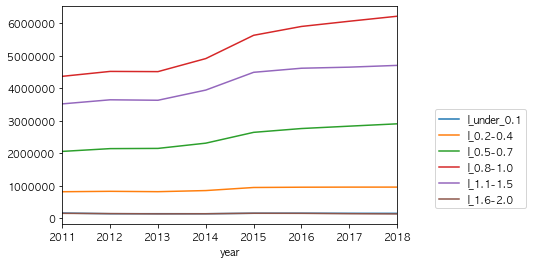

In [14]:
df.set_index('year').plot()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.3))
# plt.savefig('일별좌안시력_before_upsampling.png',bbox_inces='tight',pad_inches=0)
plt.show()


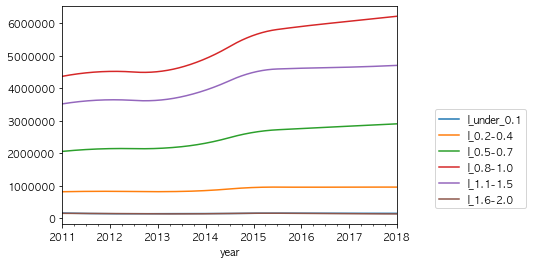

In [15]:
interpolated.plot()
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.3))


# 분기별 

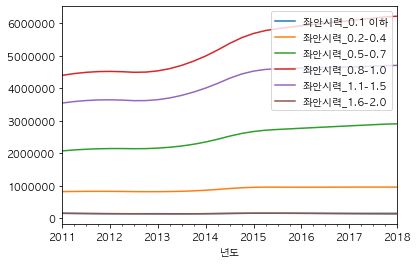

In [103]:
resample = interpolated.resample('Q')
quarterly_mean_sales = resample.mean().round().astype(int)
quarterly_mean_sales.plot()

In [105]:
quarterly_mean_sales.reset_index().to_csv('./data/분기별_좌안시력.csv', index=False)

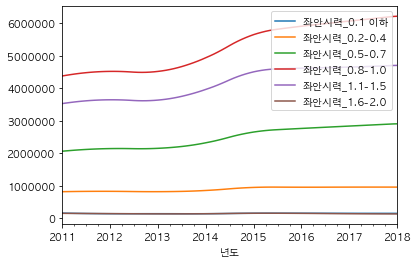

In [153]:
quarterly_mean_sales.plot()

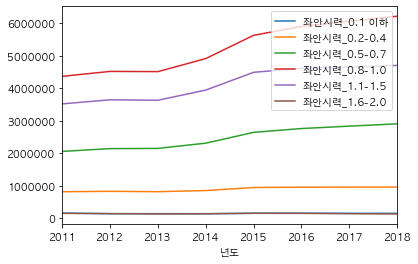

In [154]:
df.set_index('년도').plot()

In [157]:
quarterly_mean_sales

,좌안시력_0.1 이하,좌안시력_0.2-0.4,좌안시력_0.5-0.7,좌안시력_0.8-1.0,좌안시력_1.1-1.5,좌안시력_1.6-2.0
년도,,,,,,
2011-01-31,150808.656974,810889.446991,2.056239e+06,4.371385e+06,3.521993e+06,144753.801208
2011-02-28,148644.297876,813044.499092,2.067064e+06,4.392199e+06,3.539525e+06,144036.923410
2011-03-31,146622.824929,814974.767944,2.077118e+06,4.411329e+06,3.555605e+06,143322.135001
2011-04-30,144678.915783,816740.648876,2.086725e+06,4.429385e+06,3.570748e+06,142585.252689
2011-05-31,142886.019271,818268.962276,2.095519e+06,4.445662e+06,3.584358e+06,141850.578597
...,...,...,...,...,...,...
2017-09-30,144769.951819,952383.047577,2.877854e+06,6.163600e+06,4.677825e+06,128492.126238
2017-10-31,144696.202735,952320.663524,2.883829e+06,6.176425e+06,4.682942e+06,128036.175110
2017-11-30,144632.623207,952225.686651,2.889799e+06,6.189241e+06,4.688253e+06,127616.828531


In [161]:
tmp  = quarterly_mean_sales.reset_index()

In [162]:
tmp.to_csv('월별_좌안시력.csv',index=False)

In [158]:
quarterly_mean_sales.reset_index().to_csv('월별_좌안시력.csv')